使用scipy做函数差值

In [1]:
from scipy import interpolate
dir(interpolate)

['Akima1DInterpolator',
 'BPoly',
 'BarycentricInterpolator',
 'BivariateSpline',
 'CloughTocher2DInterpolator',
 'CubicSpline',
 'InterpolatedUnivariateSpline',
 'KroghInterpolator',
 'LSQBivariateSpline',
 'LSQSphereBivariateSpline',
 'LSQUnivariateSpline',
 'LinearNDInterpolator',
 'NdPPoly',
 'NearestNDInterpolator',
 'PPoly',
 'PchipInterpolator',
 'Rbf',
 'RectBivariateSpline',
 'RectSphereBivariateSpline',
 'RegularGridInterpolator',
 'SmoothBivariateSpline',
 'SmoothSphereBivariateSpline',
 'Tester',
 'UnivariateSpline',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_cubic',
 '_fitpack',
 '_ppoly',
 'absolute_import',
 'approximate_taylor_polynomial',
 'barycentric_interpolate',
 'bench',
 'bisplev',
 'bisplrep',
 'dfitpack',
 'division',
 'fitpack',
 'fitpack2',
 'griddata',
 'insert',
 'interp1d',
 'interp2d',
 'interpn',
 'interpnd',
 'interpolate',
 'krogh_interpolate',
 'lagrange

In [2]:
print(interpolate.spline.__doc__)


    Interpolate a curve at new points using a spline fit

    Parameters
    ----------
    xk, yk : array_like
        The x and y values that define the curve.
    xnew : array_like
        The x values where spline should estimate the y values.
    order : int
        Default is 3.
    kind : string
        One of {'smoothest'}
    conds : Don't know
        Don't know

    Returns
    -------
    spline : ndarray
        An array of y values; the spline evaluated at the positions `xnew`.

    


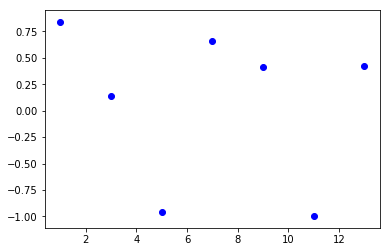

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1.0, 13.0, 7)
y = np.sin(x)

plt.scatter(x, y, c='b')
plt.show()

In [4]:
xnew = np.linspace(1.0,13.0,500)
ynewLinear = interpolate.spline(x,y,xnew,order = 1)
ynewLinear[:5]

array([ 0.84147098,  0.83304993,  0.82462888,  0.81620782,  0.80778677])

In [15]:
ynewCubic = interpolate.spline(x,y,xnew)
ynewReal = np.sin(xnew)

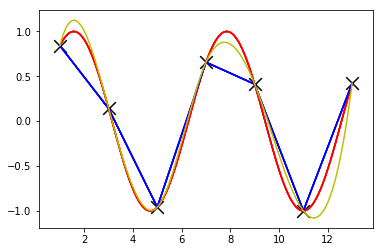

In [17]:
plt.plot(xnew,ynewReal, 'r-')
plt.plot(xnew,ynewLinear, 'b-')
plt.plot(xnew,ynewCubic, 'y-')
plt.scatter(x,y, s = 160, marker='x', color = 'k')
plt.show()

应用:期权波动率曲面构造

In [31]:
import pandas as pd
import datetime as dt
import time
pd.options.display.float_format = '{:,>.2f}'.format
dates = [dt.date(2015,3,25), dt.date(2015,4,25), dt.date(2015,6,25), dt.date(2015,9,25)]
blackVolMatrix = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])
strikes = [2.2, 2.3, 2.4, 2.5, 2.6]
table = pd.DataFrame(blackVolMatrix * 100, index = strikes, columns = dates, )
table.index.name = u'行权价'
table.columns.name = u'到期时间'

NameError: name 'Date' is not defined

In [28]:
table

到期时间,2015-03-25,2015-04-25,2015-06-25,2015-09-25
行权价,,,,
2.20,32.56,29.75,29.26,27.68
2.30,28.84,29.20,27.39,26.51
2.40,27.66,27.35,25.89,25.28
2.50,26.97,25.57,25.80,25.41
2.60,27.77,24.82,27.34,24.81


In [32]:
evaluationDate = dt.date(2015,3,3)
ttm = np.array([(d - evaluationDate).days / 365.0 for d in dates])
varianceMatrix = (blackVolMatrix**2) * ttm
varianceMatrix

array([[ 0.00639109,  0.0128489 ,  0.02674114,  0.04324205],
       [ 0.0050139 ,  0.01237794,  0.02342277,  0.03966943],
       [ 0.00461125,  0.01086231,  0.02093128,  0.03607931],
       [ 0.00438413,  0.0094909 ,  0.02079521,  0.03643376],
       [ 0.00464918,  0.00894747,  0.02334717,  0.03475378]])

In [33]:
interp = interpolate.interp2d(ttm, strikes, varianceMatrix, kind = 'linear')

In [34]:
sMeshes = np.linspace(strikes[0], strikes[-1], 400)
tMeshes = np.linspace(ttm[0], ttm[-1], 200)
interpolatedVarianceSurface = np.zeros((len(sMeshes), len(tMeshes)))
for i, s in enumerate(sMeshes):
    for j, t in enumerate(tMeshes):
        interpolatedVarianceSurface[i][j] = interp(t,s)
interpolatedVolatilitySurface = np.sqrt((interpolatedVarianceSurface / tMeshes))

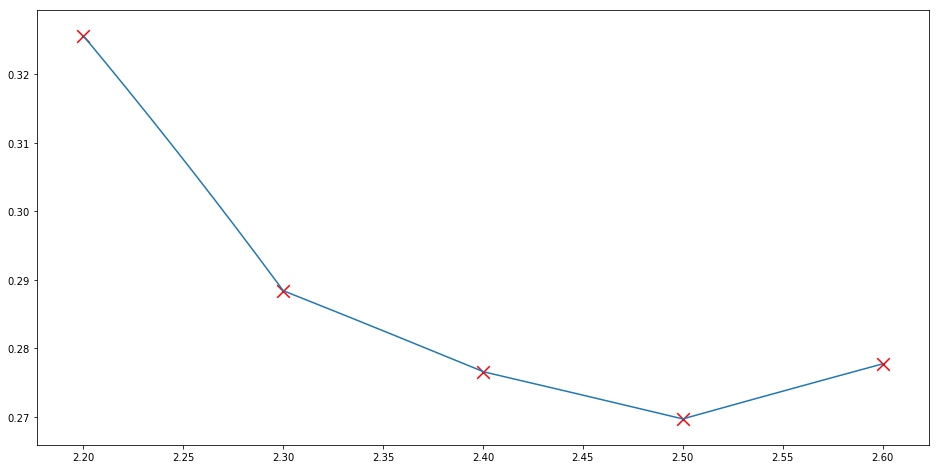

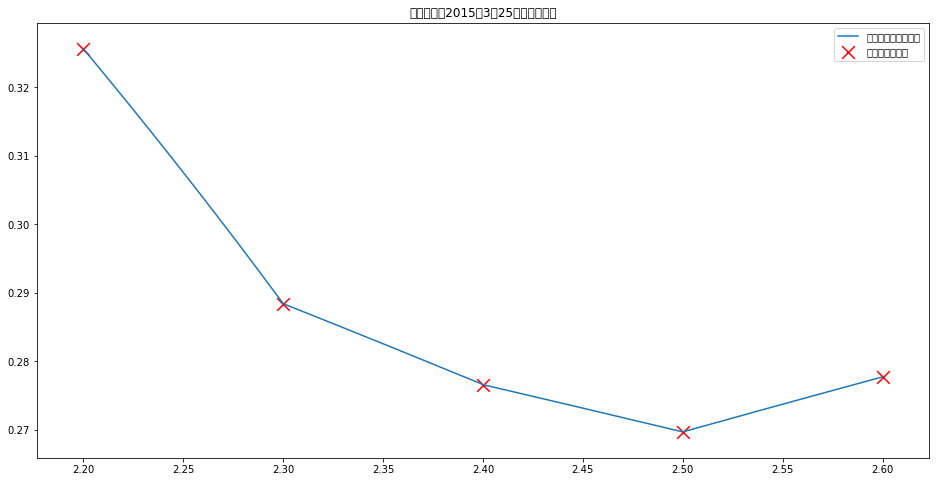

In [37]:

plt.figure(figsize = (16,8))
plt.plot(sMeshes, interpolatedVolatilitySurface[:, 0])
plt.scatter(x = strikes, y = blackVolMatrix[:,0], s = 160,marker = 'x', color = 'r')
plt.legend([u'波动率（线性插值）', u'波动率（离散）'])
plt.title(u'到期时间为2015年3月25日期权波动率')
plt.show()